In [45]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
    # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
        print(e)

2 Physical GPUs, 2 Logical GPUs


In [136]:
import tensorboard
import time

In [84]:
from tensorflow.keras.datasets import cifar10

In [132]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [101]:
from tensorflow.keras.utils import to_categorical

In [133]:
X_train = X_train/255.0
y_train = y_train/255.0
y_train = to_categorical(y_train,num_classes=10)
print(X_train.shape,y_train.shape)

(50000, 32, 32, 3) (50000, 10)


In [112]:
mdl1 = build_clf_model(5)

In [113]:
mdl1.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, None, None, 3 864         input_10[0][0]                   
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, None, None, 3 96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, None, None, 3 0           batch_normalization_282[0][0]    
____________________________________________________________________________________________

In [114]:
def build_model(input_shape = (32,32,3),num_classes=10):
    base_model = VGG16(input_shape=input_shape,include_top =False, weights = None)
    x = base_model.output
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(1024,activation='relu')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dropout(0.25)(x)
    out = tf.keras.layers.Dense(num_classes,activation='softmax')(x)
    model = tf.keras.Model(base_model.input,out)
    return model

In [139]:
tf_board = tf.keras.callbacks.TensorBoard(
    log_dir='logs', histogram_freq=0, write_graph=True,
    write_images=False, write_steps_per_second=False, update_freq='epoch',
    profile_batch=2, embeddings_freq=0, embeddings_metadata=None
)
es = tf.keras.callbacks.EarlyStopping(patience=5)

In [140]:
callback_list = [tf_board,es]

In [135]:
model = build_model()
model.compile(loss = tf.keras.losses.categorical_crossentropy)

In [116]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

In [141]:
history = model.fit(x = X_train,y = y_train, validation_split=0.2,batch_size = 32, epochs = 100,callbacks=callback_list)

Epoch 1/100
1250/1250 [==============================] - 18s 13ms/step - loss: 0.0018 - val_loss: 0.0000e+00
Epoch 2/100
1250/1250 [==============================] - 16s 12ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/100
1250/1250 [==============================] - 16s 12ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/100
1250/1250 [==============================] - 16s 13ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/100
1250/1250 [==============================] - 16s 12ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/100
1250/1250 [==============================] - 16s 13ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00


In [120]:
history = tf.keras.callbacks.History()

In [127]:
pred = model.predict(np.expand_dims(X_test[0],0))

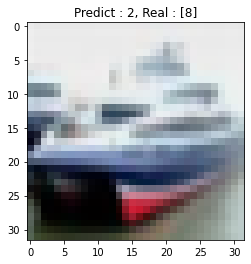

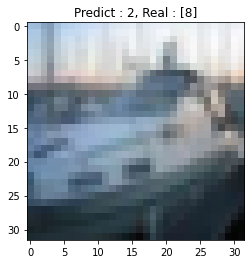

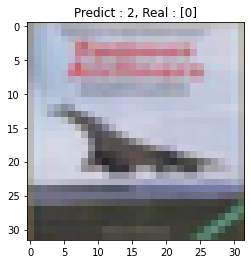

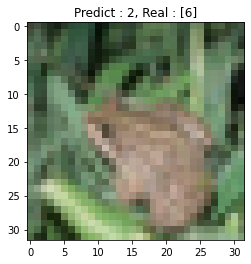

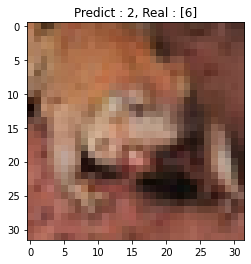

In [131]:
for i in range(1,6):
    plt.figure()
    pred = model.predict(np.expand_dims(X_test[i],0))
    plt.title(f'Predict : {np.argmax(pred)}, Real : {y_test[i]}')
    plt.imshow(X_test[i])

In [52]:
X[1].shape

(60000,)

In [43]:
import os
import tensorflow as tf
os.environ

environ{'LD_LIBRARY_PATH': '/usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64',
        'JUPYTER_TOKEN': '1020',
        'LANG': 'C.UTF-8',
        'TZ': 'Asia/Seoul',
        'HOSTNAME': 'cf36c8f0ca80',
        'NVIDIA_VISIBLE_DEVICES': 'all',
        'PASSWORD': '1020',
        'PWD': '/tf',
        'HOME': '/root',
        'CUDA_VERSION': '11.2.1',
        'NVIDIA_DRIVER_CAPABILITIES': 'compute,utility',
        'SHLVL': '1',
        'NVIDIA_REQUIRE_CUDA': 'cuda>=11.2 brand=tesla,driver>=418,driver<419 brand=tesla,driver>=440,driver<441 driver>=450',
        'PATH': '/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin',
        '_': '/usr/local/bin/jupyter',
        'JPY_PARENT_PID': '1',
        'TERM': 'xterm-color',
        'CLICOLOR': '1',
        'PAGER': 'cat',
        'GIT_PAGER': 'cat',
        'MPLBACKEND': 'module://ipykernel.pylab.backend_inline',
        'KMP_DUPLICATE

In [71]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, None, None, 3 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, None, None, 3 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, None, None, 3 0           batch_normalization_188[0][0]    
____________________________________________________________________________________________

In [1]:
from util.processor import *

In [2]:
from util.cfg import *

In [34]:
init_params.update({
    'svs_path':'../data/TCGA/2bde271f-9a0e-4dfe-8bef-6e996e22a0ed/TCGA-AM-5820-01Z-00-DX1.365538bf-65ff-4fcd-8862-90627484431c.svs',
    'xml_path':''
})

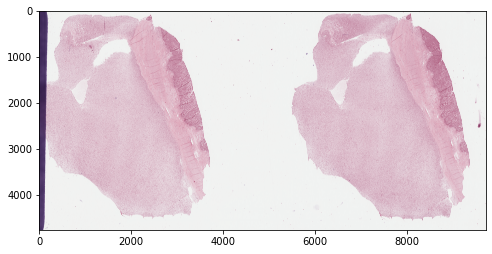

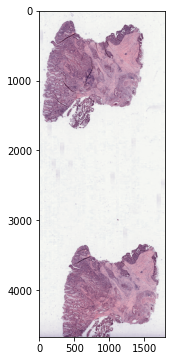

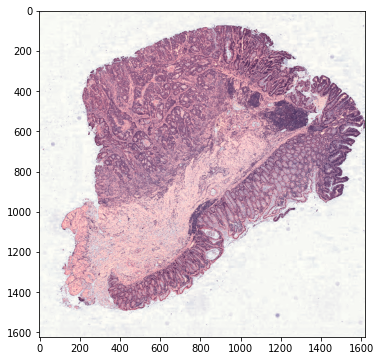

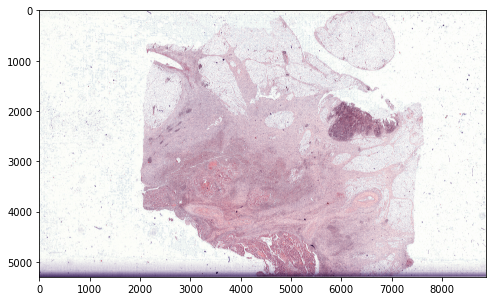

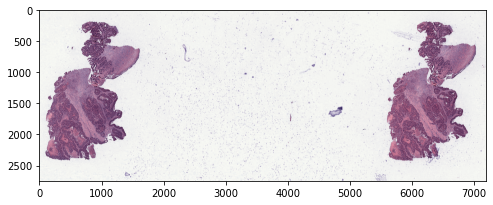

In [41]:
for svs_path in glob.glob('../data/TCGA/*/*.svs')[:5]:
    init_params.update({'svs_path':svs_path})
    slide = slide_processor(init_params)
    normed = stain_norm(slide.arr)
    plt.figure(figsize = (8,6))
    plt.imshow(normed)

In [ ]:
'../data/ISH/CRC_001.svs'

In [39]:
t = stain_norm(slide.arr)

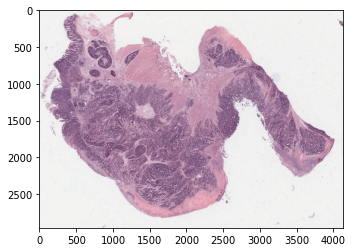

In [40]:
import matplotlib.pyplot as plt
plt.imshow(t)

In [35]:
slide = slide_processor(init_params)

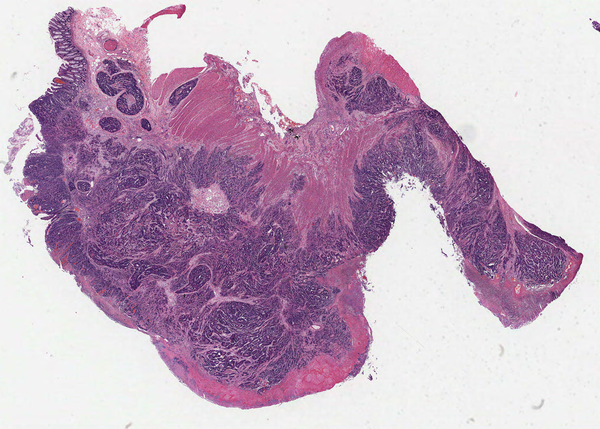

In [36]:
slide.slide.get_thumbnail((600,600))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

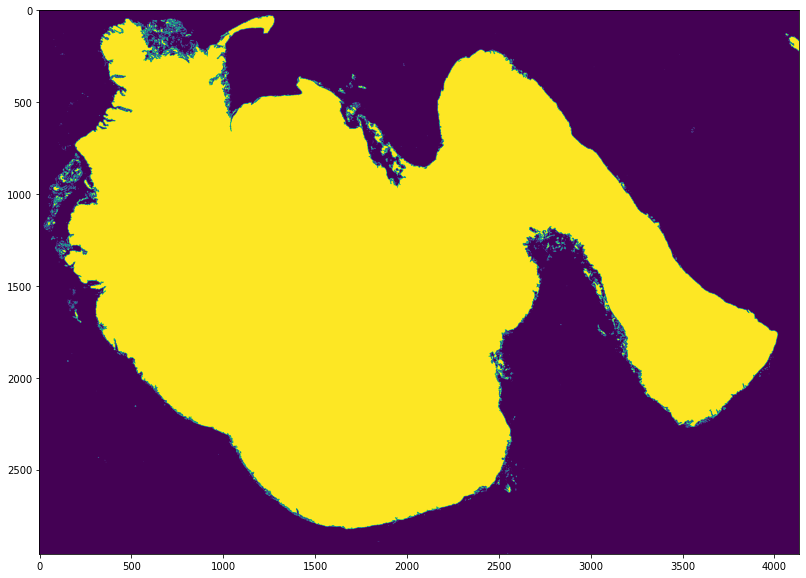

In [37]:
slide.get_tissue_mask(show=True)